In [14]:
import pandas as pd

In [15]:
df1=pd.read_csv("new_filtered_file1.csv")
df1

,owner,brand,price,kms_driven,age,power
0,0,19,35000.0,17654.0,3.0,110.0
1,0,17,119900.0,11000.0,4.0,350.0
2,0,20,600000.0,110.0,8.0,675.0
3,0,19,65000.0,16329.0,4.0,180.0
4,0,21,80000.0,10000.0,3.0,150.0
...,...,...,...,...,...,...
7319,0,5,25000.0,48587.0,8.0,150.0
7320,0,1,35000.0,60000.0,9.0,220.0
7321,0,4,450000.0,3430.0,4.0,750.0
7322,0,1,139000.0,21300.0,4.0,400.0


In [16]:
x=df1.drop('price',axis=1)
y=df1[['price']]
x

,owner,brand,kms_driven,age,power
0,0,19,17654.0,3.0,110.0
1,0,17,11000.0,4.0,350.0
2,0,20,110.0,8.0,675.0
3,0,19,16329.0,4.0,180.0
4,0,21,10000.0,3.0,150.0
...,...,...,...,...,...
7319,0,5,48587.0,8.0,150.0
7320,0,1,60000.0,9.0,220.0
7321,0,4,3430.0,4.0,750.0
7322,0,1,21300.0,4.0,400.0


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [20]:
svr.score(x_test,y_test)

-0.07140095727371132

In [21]:
lr.score(x_test,y_test)

0.6558568544674872

In [22]:
lr.predict(x_test)

array([[ 71223.80650972],
       [ 69694.69484181],
       [ 91578.18922484],
       ...,
       [ 24281.00031483],
       [ 59209.63994656],
       [139725.54228596]], shape=(1465, 1))

In [23]:
import joblib
joblib.dump(lr,"model.lb")

['model.lb']

In [24]:
from sklearn.datasets import load_iris
x,y=load_iris(return_X_y=True) 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [26]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# Enhanced EDA, Visualizations, and Robust Modeling

This section adds exploratory data analysis, informative plots, and a more robust modeling pipeline with evaluation and model persistence to use in the app.

In [27]:
# Reload the dataset for EDA and modeling from scratch
import pandas as pd
import numpy as np

# Ensure path is correct relative to notebook
DATA_PATH = 'new_filtered_file1.csv'
df = pd.read_csv(DATA_PATH)

# Basic overview
print(df.shape)
df.head()

(7324, 6)


,owner,brand,price,kms_driven,age,power
0,0,19,35000.0,17654.0,3.0,110.0
1,0,17,119900.0,11000.0,4.0,350.0
2,0,20,600000.0,110.0,8.0,675.0
3,0,19,65000.0,16329.0,4.0,180.0
4,0,21,80000.0,10000.0,3.0,150.0


In [28]:
# EDA: Missing values and basic stats
missing = df.isna().sum().sort_values(ascending=False)
print('Missing values by column:')
print(missing[missing>0])

# Describe numeric columns
num_desc = df.describe(include='number').T
num_desc

Missing values by column:
Series([], dtype: int64)


,count,mean,std,min,25%,50%,75%,max
owner,7324.0,0.196341,0.622276,0.0,0.00,0.0,0.0,3.0
brand,7324.0,9.326188,7.520464,0.0,1.00,6.0,17.0,22.0
price,7324.0,84883.900055,120966.194387,4400.0,30000.00,55000.0,100000.0,1900000.0
kms_driven,7324.0,23910.496587,27317.594631,1.0,10155.75,19000.0,30112.0,750000.0
age,7324.0,6.656472,3.605299,1.0,4.00,6.0,8.0,63.0
power,7324.0,228.133397,158.324219,100.0,125.00,160.0,350.0,1800.0


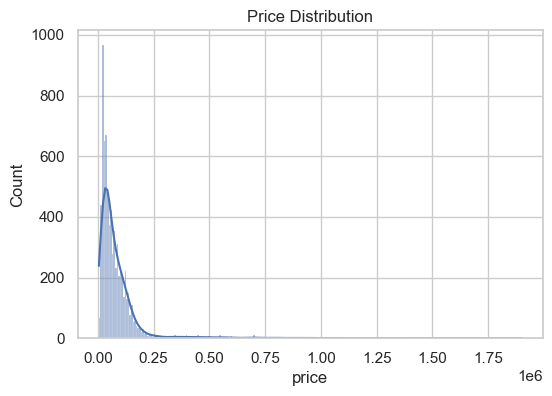

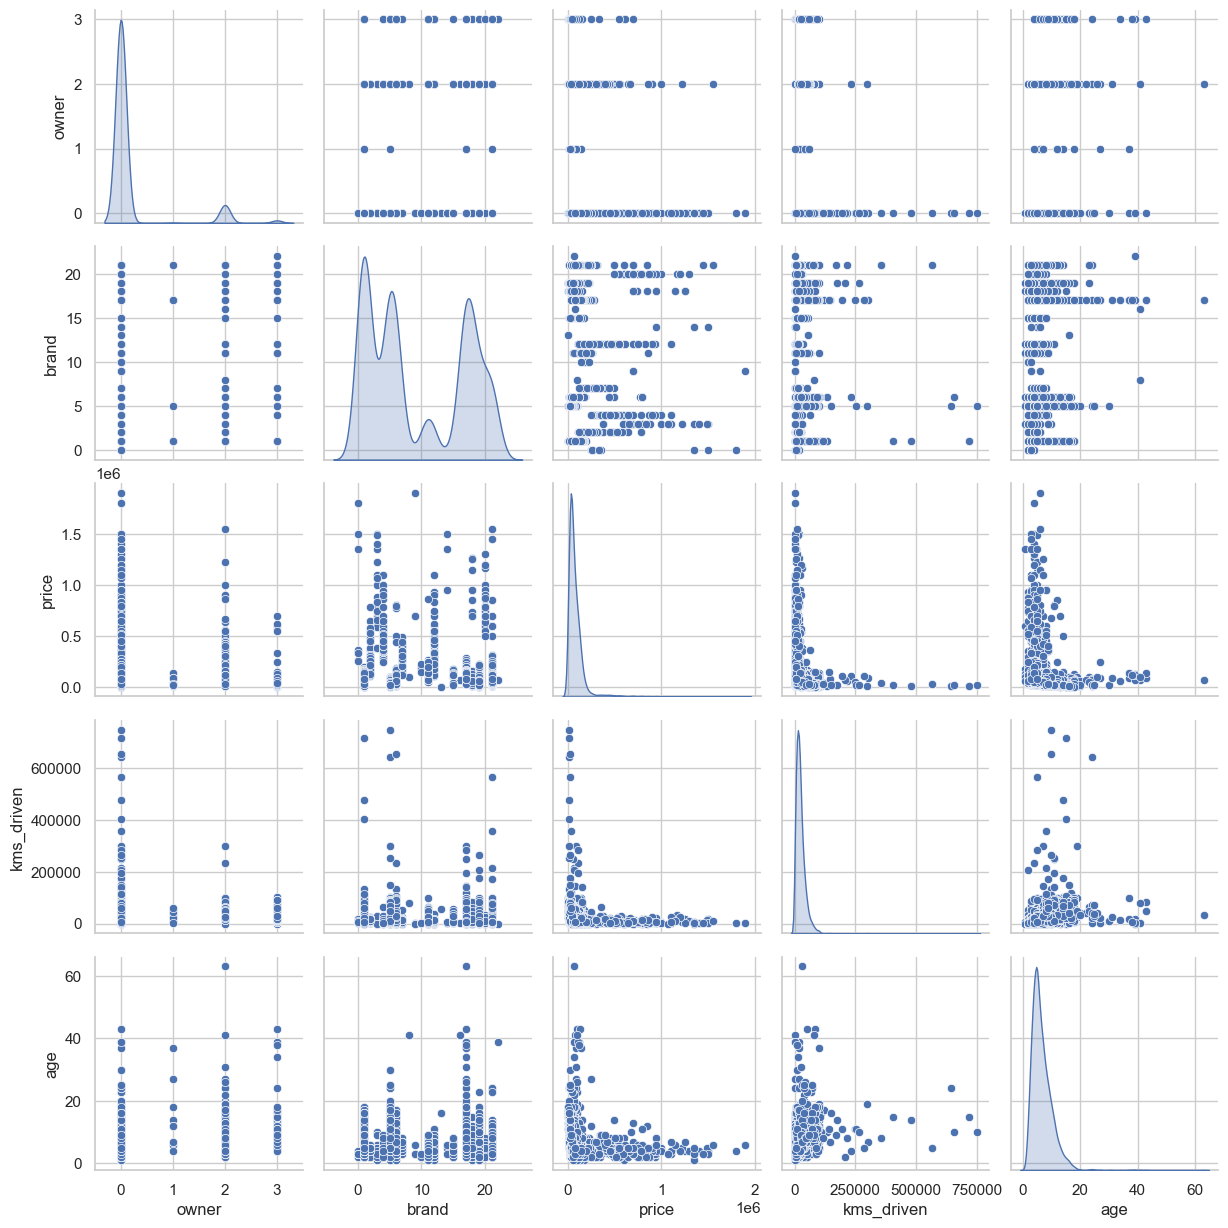

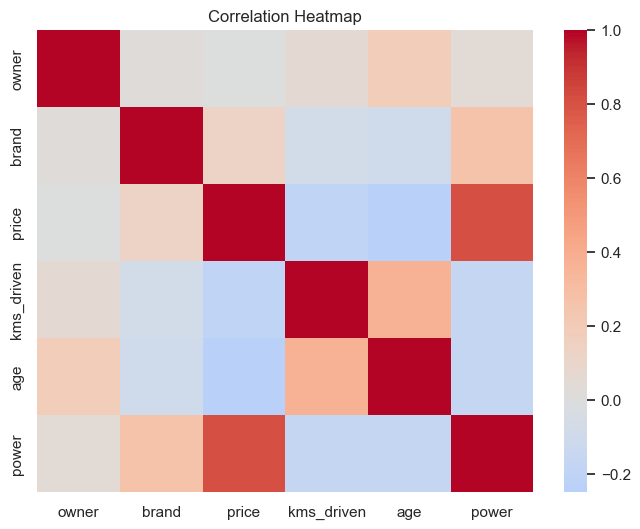

In [29]:
# Visualizations: distributions and correlations
import matplotlib.pyplot as plt
import seaborn as sns

_ = sns.set(style='whitegrid', context='notebook')

num_cols = df.select_dtypes(include='number').columns.tolist()

# Histogram for price if present
if 'price' in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df['price'], kde=True)
    plt.title('Price Distribution')
    plt.show()

# Pairplot on a subset for readability
subset = num_cols[:5]
if len(subset) >= 2:
    sns.pairplot(df[subset], diag_kind='kde')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
# Robust modeling: preprocessing + model pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Define target and features
assert 'price' in df.columns, "Expected 'price' column in data"
X = df.drop(columns=['price'])
y = df['price']

num_features = X.select_dtypes(include='number').columns.tolist()
cat_features = X.select_dtypes(exclude='number').columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Use sparse_output=False for current scikit-learn versions
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ],
    remainder='drop'
)

model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Evaluate
preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = float(np.sqrt(mse))
r2 = r2_score(y_test, preds)
print({'MAE': mae, 'RMSE': rmse, 'R2': r2})

{'MAE': 37831.5544000181, 'RMSE': 74189.24077345802, 'R2': 0.7172878188125682}


In [33]:
# Persist the trained pipeline
import joblib
joblib.dump(model, 'model.lb')
'Pipeline saved to model.lb'

'Pipeline saved to model.lb'